In [178]:
#import necessary librararies for EDA.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

%matplotlib inline

In [194]:
#load data set
loan_df=pd.read_csv("Bank_Personal_Loan_Modelling.csv")

In [195]:
#Adding headers or column name to Data set
loan_df.columns = ['id', 'age', 'experience', 'income', 'zip_code', 'family', 'cc_avg', 'education',
                  'mortgage', 'personal_loan', 'securities_account', 'cd_account', 'online', 'credit_card']

In [196]:
loan_df.head()

,id,age,experience,income,zip_code,family,cc_avg,education,mortgage,personal_loan,securities_account,cd_account,online,credit_card
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


By observing structure of data set we can tell that the column header is present and it looks good and also we can tell that all the attributes are having data type as int or float although we will check that in next step.

In [272]:
#To check total entries in data and number of columns and details like data type.
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
age                   5000 non-null int64
experience            5000 non-null int64
income                5000 non-null int64
family                5000 non-null int64
cc_avg                5000 non-null float64
education             5000 non-null int64
mortgage              5000 non-null int64
personal_loan         5000 non-null int64
securities_account    5000 non-null int64
cd_account            5000 non-null int64
online                5000 non-null int64
credit_card           5000 non-null int64
dtypes: float64(1), int64(11)
memory usage: 468.8 KB


In [273]:
loan_df.shape

(5000, 12)

So we can see above that there are 5000 entries or rowsw of daat in 14 columns or attributes and all of them are having data type as int64 or float64 which is good to compute further.

In [183]:
#To check is there any null values present in any of the attribute
loan_df.isnull().sum()

id                    0
age                   0
experience            0
income                0
zip_code              0
family                0
cc_avg                0
education             0
mortgage              0
personal_loan         0
securities_account    0
cd_account            0
online                0
credit_card           0
dtype: int64

So we can see that there are no null values present in data set so we can proceed to next step

In [184]:
#By observing data set I found out that there are few attributes which we dont need at this point
#to prepare model so we can drop those attributes like ID and ZIP COde although we can use ZIP Code but 
#for now to make it easy and simple I am dropping it.
dummies_variables=['id', 'zip_code']
loan_df=loan_df.drop(dummies_variables, axis=1)

In [185]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
age                   5000 non-null int64
experience            5000 non-null int64
income                5000 non-null int64
family                5000 non-null int64
cc_avg                5000 non-null float64
education             5000 non-null int64
mortgage              5000 non-null int64
personal_loan         5000 non-null int64
securities_account    5000 non-null int64
cd_account            5000 non-null int64
online                5000 non-null int64
credit_card           5000 non-null int64
dtypes: float64(1), int64(11)
memory usage: 468.8 KB


In [186]:
loan_df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,5000.0,45.338400,11.463166,23.0,35.0,45.0,55.0,67.0
experience,5000.0,20.104600,11.467954,-3.0,10.0,20.0,30.0,43.0
income,5000.0,73.774200,46.033729,8.0,39.0,64.0,98.0,224.0
family,5000.0,2.396400,1.147663,1.0,1.0,2.0,3.0,4.0
cc_avg,5000.0,1.937938,1.747659,0.0,0.7,1.5,2.5,10.0
education,5000.0,1.881000,0.839869,1.0,1.0,2.0,3.0,3.0
mortgage,5000.0,56.498800,101.713802,0.0,0.0,0.0,101.0,635.0
personal_loan,5000.0,0.096000,0.294621,0.0,0.0,0.0,0.0,1.0
securities_account,5000.0,0.104400,0.305809,0.0,0.0,0.0,0.0,1.0
cd_account,5000.0,0.060400,0.238250,0.0,0.0,0.0,0.0,1.0


SO here, we can see that there are attributes like age, family, cc_avg these are almost having normal distribution. Attributes like income, moirtgage are relatively skwed in nature and may have outliers, that we can check on further analysis and lastly for the attribute experience it is also almost nomally distributed but i can see that the minimum value for it is -3 whcih is not possible so that can be typo error so I can remove -ve sign and consider only the absolute value. Rest all attributes are categorical in nature.

In [187]:
#to remove -ve sign from experience attribute
loan_df['experience'] = loan_df['experience'].abs()

In [188]:
loan_df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,5000.0,45.338400,11.463166,23.0,35.0,45.0,55.0,67.0
experience,5000.0,20.134600,11.415189,0.0,10.0,20.0,30.0,43.0
income,5000.0,73.774200,46.033729,8.0,39.0,64.0,98.0,224.0
family,5000.0,2.396400,1.147663,1.0,1.0,2.0,3.0,4.0
cc_avg,5000.0,1.937938,1.747659,0.0,0.7,1.5,2.5,10.0
education,5000.0,1.881000,0.839869,1.0,1.0,2.0,3.0,3.0
mortgage,5000.0,56.498800,101.713802,0.0,0.0,0.0,101.0,635.0
personal_loan,5000.0,0.096000,0.294621,0.0,0.0,0.0,0.0,1.0
securities_account,5000.0,0.104400,0.305809,0.0,0.0,0.0,0.0,1.0
cd_account,5000.0,0.060400,0.238250,0.0,0.0,0.0,0.0,1.0


Thus -ve sign is removed from attribute experience now we can plot few of the graphs to see the distribution and outliers present in data

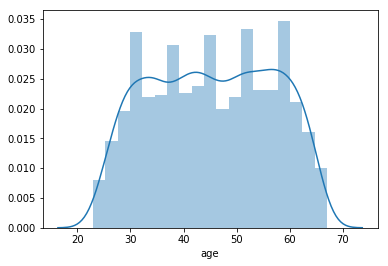

In [189]:
#lets plot dist plot and analyse the distribution
sns.distplot(loan_df['age'])

SO we can see that age attribute is normally distributed across the data

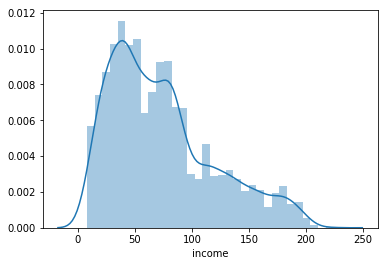

In [190]:
sns.distplot(loan_df['income'])

So income across the data have a bit of left skweness in it so we can say that maximum records have a income of ranges from 10000$ to 80000$

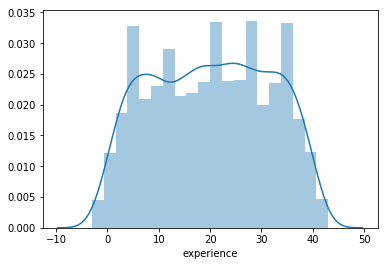

In [197]:
sns.distplot(loan_df['experience'])

experience tghrought the data in almost uniformally distributed 

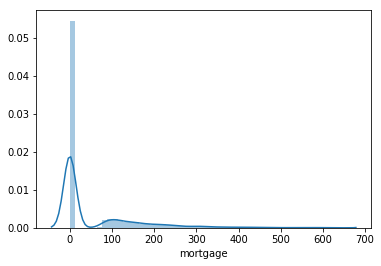

In [198]:
sns.distplot(loan_df['mortgage'])

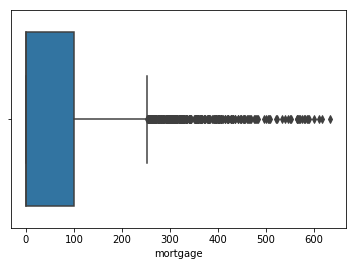

In [199]:
sns.boxplot(loan_df['mortgage'])

By performimng dist plot and box plot on mortgage attribute we can see that there are high range of outlier present in data.

Lets now plot and see how categorical data is distributed along data set in terms of counts 

1    0.2944
2    0.2592
4    0.2444
3    0.2020
Name: family, dtype: float64


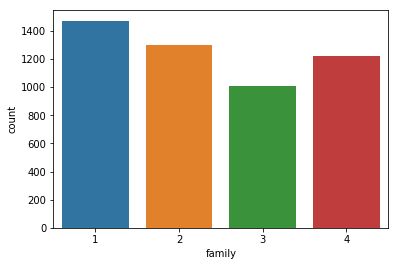

In [200]:
sns.countplot(loan_df['family'])
print(loan_df['family'].value_counts(normalize=True))

So most of the enteirs shows that they are single or alone which is around 29% of entire data and family size with 3 is least which is around 20% of data set

1    0.4192
3    0.3002
2    0.2806
Name: education, dtype: float64


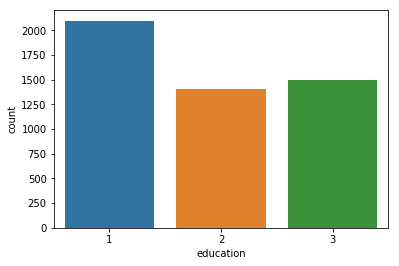

In [201]:
sns.countplot(loan_df['education'])
print(loan_df['education'].value_counts(normalize=True))

0    0.8956
1    0.1044
Name: securities_account, dtype: float64


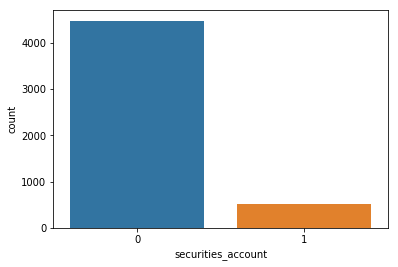

In [202]:
sns.countplot(loan_df['securities_account'])
print(loan_df['securities_account'].value_counts(normalize=True))

securities account are there for around 10% of entire data set, rest does not have any securities account.

0    4698
1     302
Name: cd_account, dtype: int64


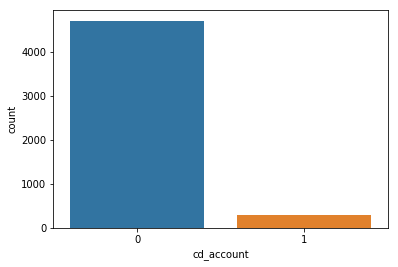

In [203]:
sns.countplot(loan_df['cd_account'])
print(loan_df['cd_account'].value_counts())

out of 5000 customers only 302 have the certificate of deposit which is merely 6% of entire data.

1    0.5968
0    0.4032
Name: online, dtype: float64


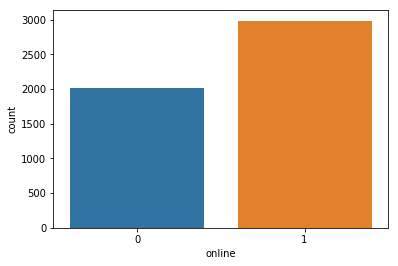

In [204]:
sns.countplot(loan_df['online'])
print(loan_df['online'].value_counts(normalize=True))

From the above plot we can see that around 60% customers are using online facilities provided by bank

0    0.706
1    0.294
Name: credit_card, dtype: float64


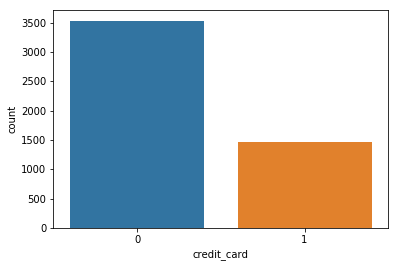

In [205]:
sns.countplot(loan_df['credit_card'])
print(loan_df['credit_card'].value_counts(normalize=True))

Around 29% customerts are using credit card facility. 

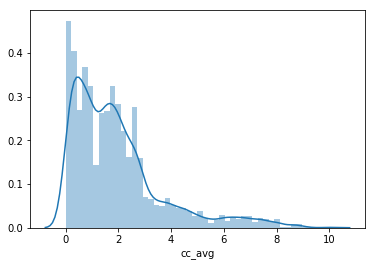

In [206]:
sns.distplot(loan_df['cc_avg'])

If we see the above graph then we can say that credit carde bill ranges maximum from 0 to 3000$ 

0    0.904
1    0.096
Name: personal_loan, dtype: float64


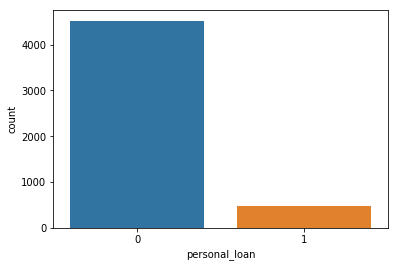

In [207]:
#Target column distribution and how it is related to different columns
sns.countplot(loan_df['personal_loan'])
print(loan_df['personal_loan'].value_counts(normalize=True))

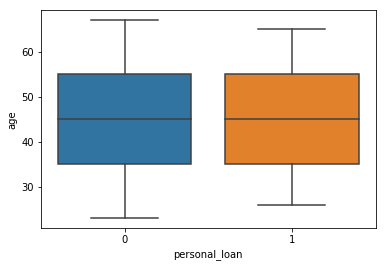

In [208]:
sns.boxplot(x='personal_loan', y='age', data=loan_df)

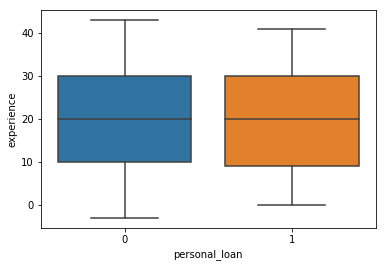

In [209]:
sns.boxplot(x='personal_loan', y='experience', data=loan_df)

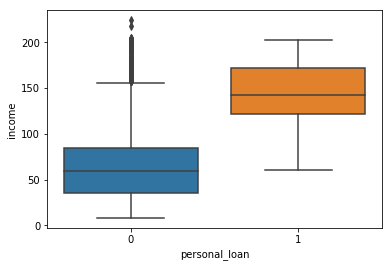

In [210]:
sns.boxplot(x='personal_loan', y='income', data=loan_df)

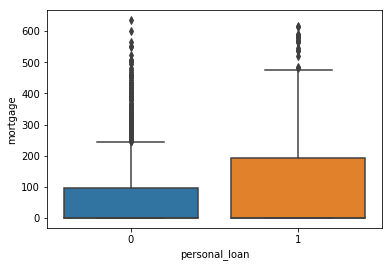

In [211]:
sns.boxplot(x='personal_loan', y='mortgage', data=loan_df)

So we can observe that out of 5000 customers only 9.6% customers turn out to take personal loan and by performing box plot on related attributes we can see that there are few outliers present in income and mortgage.

In [212]:
loan_df.groupby(["personal_loan"]).count()

,id,age,experience,income,zip_code,family,cc_avg,education,mortgage,securities_account,cd_account,online,credit_card
personal_loan,,,,,,,,,,,,,
0,4520,4520,4520,4520,4520,4520,4520,4520,4520,4520,4520,4520,4520
1,480,480,480,480,480,480,480,480,480,480,480,480,480


In [213]:
#To see how each of the attributes are related to each other we use corr()
loan_df.corr()

,id,age,experience,income,zip_code,family,cc_avg,education,mortgage,personal_loan,securities_account,cd_account,online,credit_card
id,1.000000,-0.008473,-0.008326,-0.017695,0.013432,-0.016797,-0.024675,0.021463,-0.013920,-0.024801,-0.016972,-0.006909,-0.002528,0.017028
age,-0.008473,1.000000,0.994215,-0.055269,-0.029216,-0.046418,-0.052012,0.041334,-0.012539,-0.007726,-0.000436,0.008043,0.013702,0.007681
experience,-0.008326,0.994215,1.000000,-0.046574,-0.028626,-0.052563,-0.050077,0.013152,-0.010582,-0.007413,-0.001232,0.010353,0.013898,0.008967
income,-0.017695,-0.055269,-0.046574,1.000000,-0.016410,-0.157501,0.645984,-0.187524,0.206806,0.502462,-0.002616,0.169738,0.014206,-0.002385
zip_code,0.013432,-0.029216,-0.028626,-0.016410,1.000000,0.011778,-0.004061,-0.017377,0.007383,0.000107,0.004704,0.019972,0.016990,0.007691
family,-0.016797,-0.046418,-0.052563,-0.157501,0.011778,1.000000,-0.109275,0.064929,-0.020445,0.061367,0.019994,0.014110,0.010354,0.011588
cc_avg,-0.024675,-0.052012,-0.050077,0.645984,-0.004061,-0.109275,1.000000,-0.136124,0.109905,0.366889,0.015086,0.136534,-0.003611,-0.006689
education,0.021463,0.041334,0.013152,-0.187524,-0.017377,0.064929,-0.136124,1.000000,-0.033327,0.136722,-0.010812,0.013934,-0.015004,-0.011014
mortgage,-0.013920,-0.012539,-0.010582,0.206806,0.007383,-0.020445,0.109905,-0.033327,1.000000,0.142095,-0.005411,0.089311,-0.005995,-0.007231
personal_loan,-0.024801,-0.007726,-0.007413,0.502462,0.000107,0.061367,0.366889,0.136722,0.142095,1.000000,0.021954,0.316355,0.006278,0.002802


In the above table i used corr() to check the correlation btween all the independent variable and how all the independent variables are related to target variable. 
In this we can see that age and experience both have very strong +ve relationship so we can tell that one of the feature can be dropped then also we can get almost same accuracy while creating our model, but here we will not drop it.
We can even see that experience has negative relationship with income of customer which is a bit wierd as usually with more num of experience in work the income should increase.
Experience has a +ve corelation with education so this is kind of normal thing.
And when we see our target column "personal_loan" then we can observe that it has -ve corelation with only two attributes they are (age, experience) and with rest other attributes it has +ve relationship and it is highly corelated with income and cc_avg(Average spending on credit card per month)

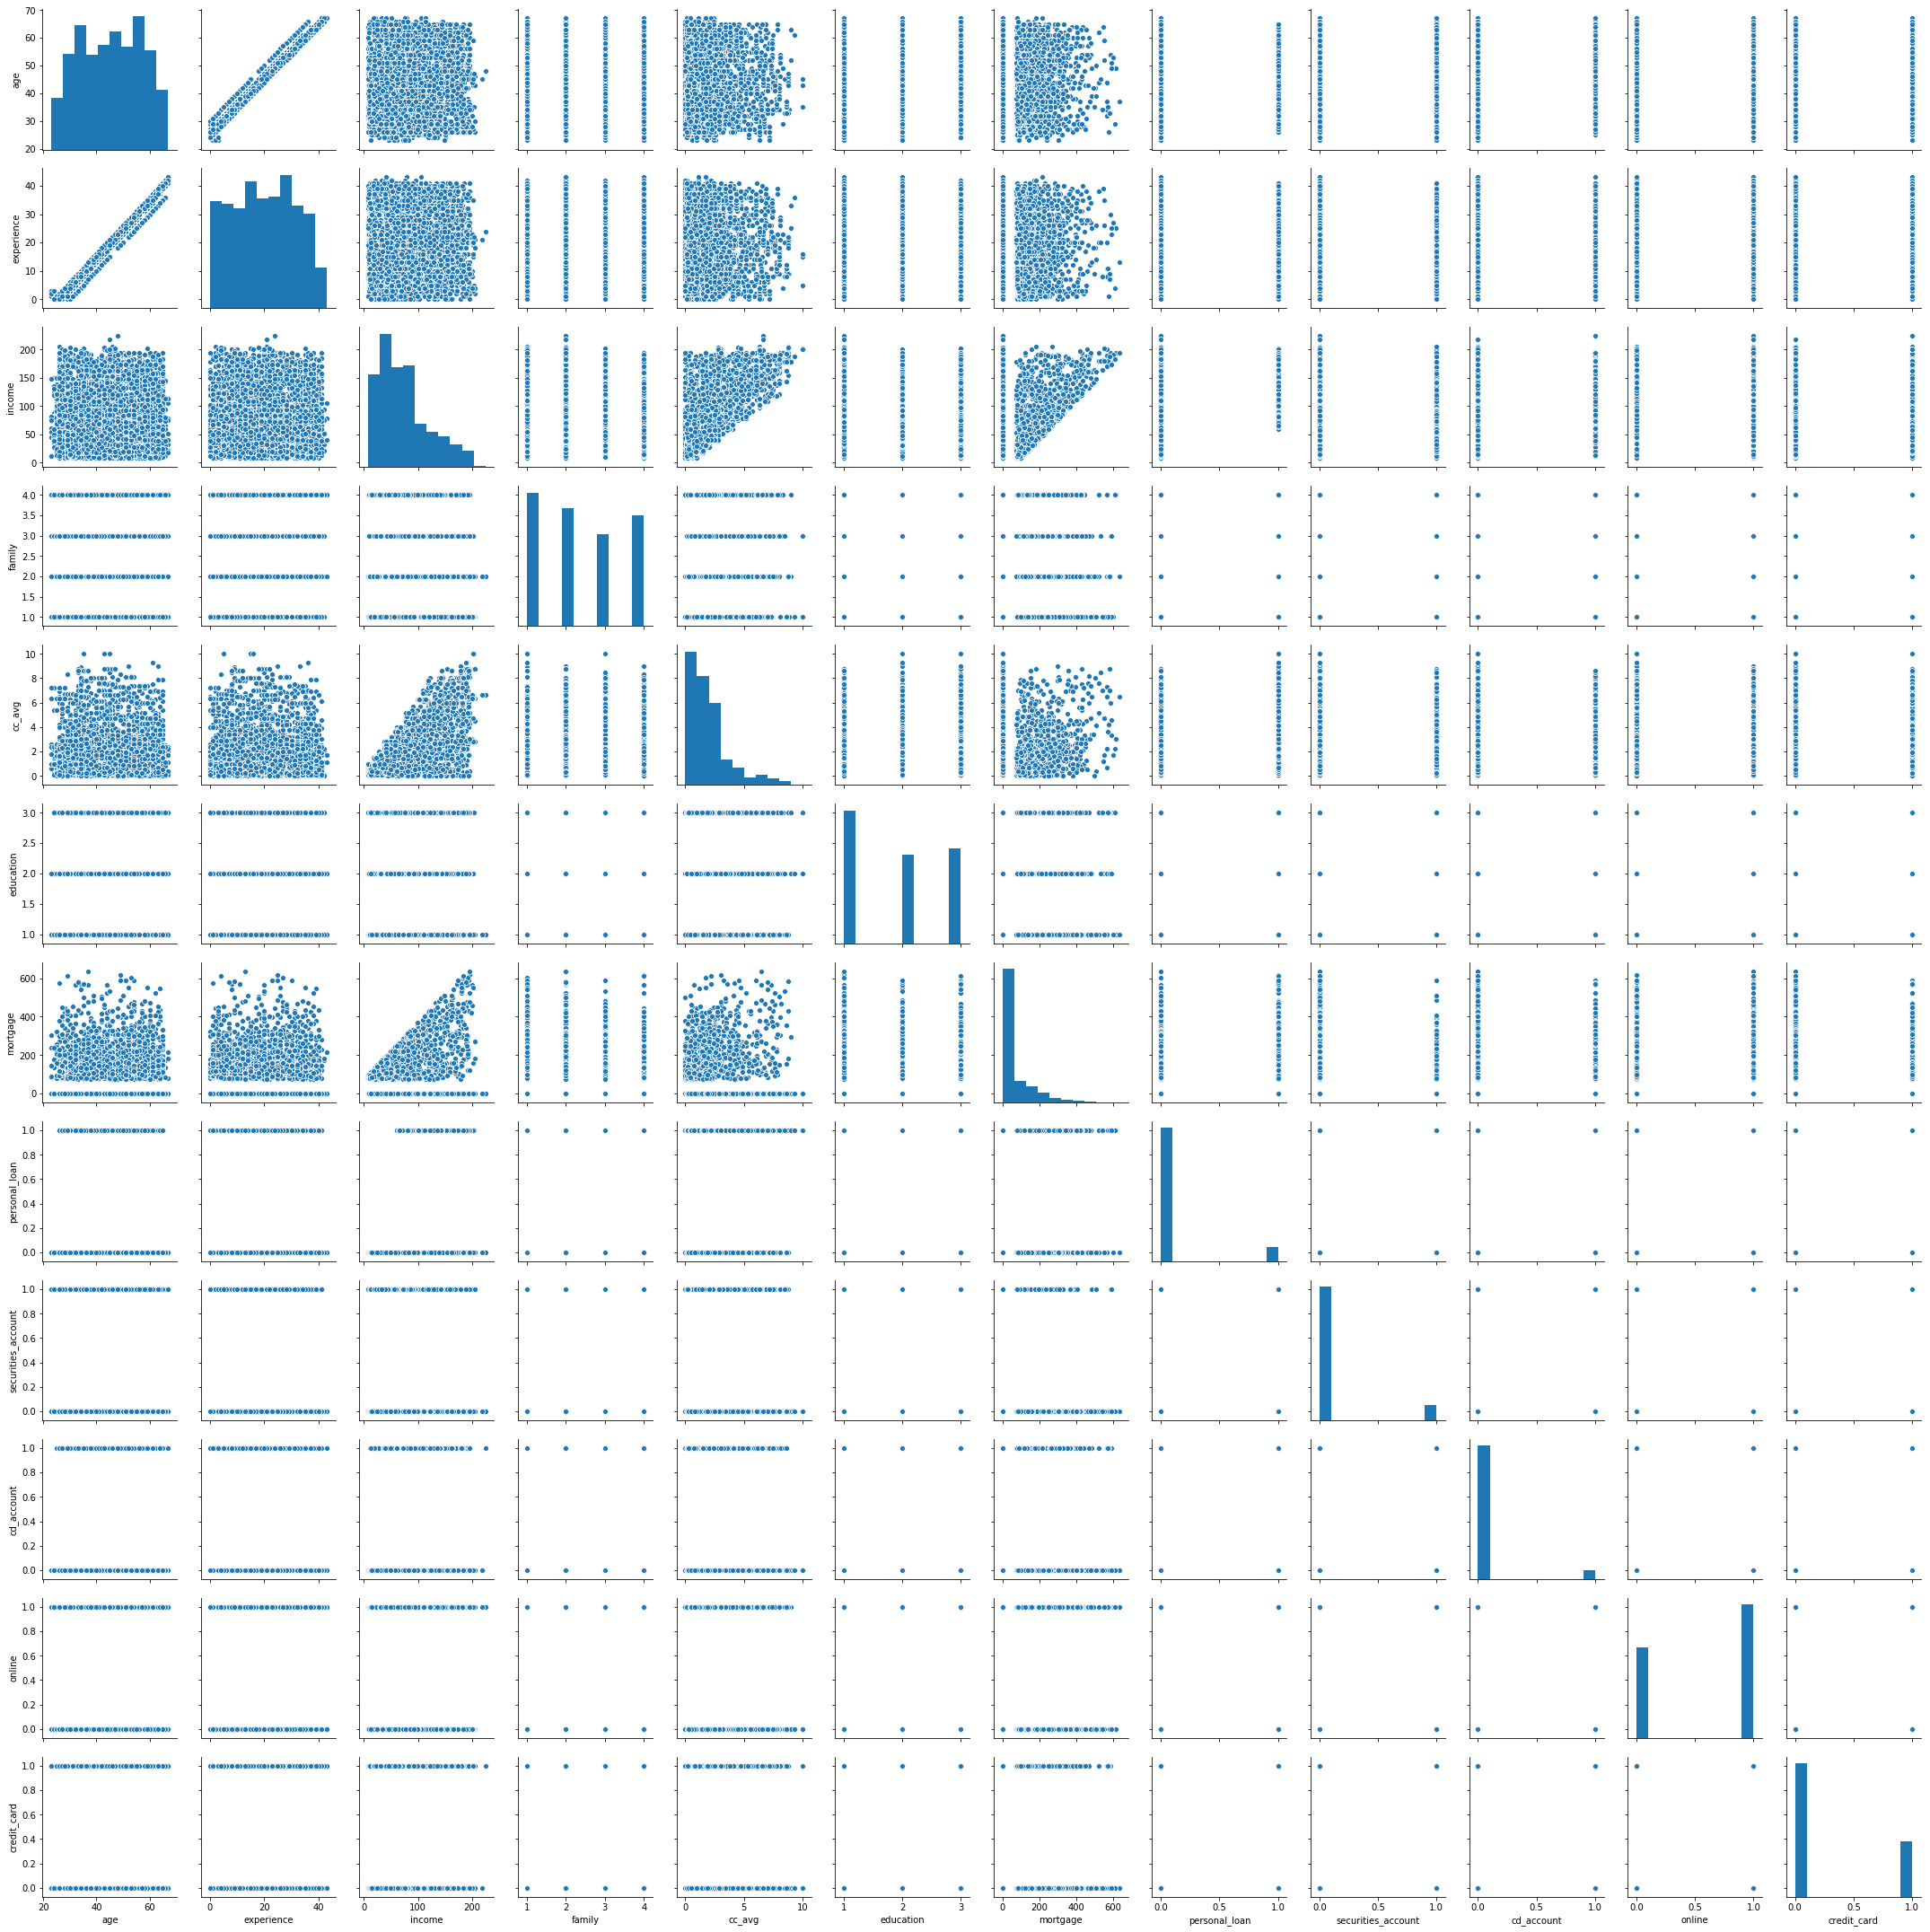

In [177]:
#Used pairplot to see distribution of each attribute through out the data set
sns.pairplot(loan_df)

In [155]:
loan_df.groupby(["personal_loan"]).count()

,age,experience,income,family,cc_avg,education,mortgage,securities_account,cd_account,online,credit_card
personal_loan,,,,,,,,,,,
0,4520,4520,4520,4520,4520,4520,4520,4520,4520,4520,4520
1,480,480,480,480,480,480,480,480,480,480,480


Splitting data set into training and testing (70:30)

In [215]:
from sklearn.model_selection import train_test_split 

X = loan_df.drop('personal_loan' , axis=1)
y = loan_df['personal_loan']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.30, random_state=5)

Create model using Logistic Regression

In [165]:
from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression()
log_model.fit(X_train, y_train)

C:\Users\Asus\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [167]:
log_model.score(X_train, y_train)

0.9488571428571428

In [168]:
log_model.score(X_test, y_test)

0.9493333333333334

In [173]:
from sklearn import metrics

y_predict = log_model.predict(X_test)

print(metrics.confusion_matrix(y_test, y_predict))

array([[1331,   20],
       [  56,   93]], dtype=int64)

In [264]:
print(metrics.classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1351
           1       1.00      1.00      1.00       149

   micro avg       1.00      1.00      1.00      1500
   macro avg       1.00      1.00      1.00      1500
weighted avg       1.00      1.00      1.00      1500



Classification model: Naive bayes Classifier

In [225]:
#Same data set will be used as we used for logistic regression

from sklearn.naive_bayes import GaussianNB

NB_model = GaussianNB()
NB_model.fit(X_train, y_train)
print(NB_model)

GaussianNB(priors=None, var_smoothing=1e-09)


In [226]:
print(NB_model.score(X_train, y_train))

print(NB_model.score(X_test, y_test))

0.888
0.8806666666666667


In [220]:
y_predict = NB_model.predict(X_test)

print(metrics.confusion_matrix(y_test, y_predict))

[[1239  112]
 [  67   82]]


In [221]:
print(metrics.classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.95      0.92      0.93      1351
           1       0.42      0.55      0.48       149

   micro avg       0.88      0.88      0.88      1500
   macro avg       0.69      0.73      0.71      1500
weighted avg       0.90      0.88      0.89      1500



K-Nearest Neighbors based Classification

In [238]:
#import libraries required for K-NN to prepare data set

from scipy.stats import zscore

dummies_variables=['id', 'zip_code']
loan_df=loan_df.drop(dummies_variables, axis=1)
loan_df_z = loan_df.apply(zscore)
loan_df_z.describe().T

,count,mean,std,min,25%,50%,75%,max
age,5000.0,2.478018e-17,1.0001,-1.948906,-0.901970,-0.029524,0.842923,1.889859
experience,5000.0,-1.693312e-16,1.0001,-2.014911,-0.881204,-0.009122,0.862960,1.996667
income,5000.0,1.939449e-16,1.0001,-1.428969,-0.755483,-0.212348,0.526315,3.263712
family,5000.0,7.850609e-16,1.0001,-1.216855,-1.216855,-0.345432,0.525991,1.397414
cc_avg,5000.0,-2.078338e-17,1.0001,-1.108987,-0.708412,-0.250611,0.321641,4.613525
education,5000.0,-6.315837e-16,1.0001,-1.049078,-1.049078,0.141703,1.332484,1.332484
mortgage,5000.0,2.810197e-16,1.0001,-0.555524,-0.555524,-0.555524,0.437558,5.688108
personal_loan,5000.0,-5.565326e-16,1.0001,-0.325875,-0.325875,-0.325875,-0.325875,3.068659
securities_account,5000.0,5.092149e-16,1.0001,-0.341423,-0.341423,-0.341423,-0.341423,2.928915
cd_account,5000.0,4.426903e-16,1.0001,-0.253540,-0.253540,-0.253540,-0.253540,3.944146


In [246]:
#To prepare train set and test set then apply random function tp split data
from sklearn.model_selection import train_test_split

loan_df_labels = loan_df["personal_loan"]

X = np.array(loan_df_z)
print(X.shape)

y = np.array(loan_df_labels)
print(y.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=5)


(5000, 12)
(5000,)


In [259]:
#import KNN package and check the accuracy

from sklearn.neighbors import KNeighborsClassifier

NHH = KNeighborsClassifier(n_neighbors = 7, weights = 'distance')

NHH.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=7, p=2,
           weights='distance')

In [260]:
y_predict = NHH.predict(X_test)

print(NHH.score(X_train, y_train))

print(NHH.score(X_test, y_test))

1.0
1.0


In [261]:
from sklearn import metrics

print(metrics.confusion_matrix(y_test, y_predict))

[[1351    0]
 [   0  149]]


In [262]:
print(metrics.classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1351
           1       1.00      1.00      1.00       149

   micro avg       1.00      1.00      1.00      1500
   macro avg       1.00      1.00      1.00      1500
weighted avg       1.00      1.00      1.00      1500



I have performed 3 classification model on this particular data set as logistic regression, Naive bayes Classifier and K Nearest Neighbour Classifier.
By performing all the three i came to the conlusion that naive bayes approach is the best approch and KNN is giving a overfit model without a single error, so chances of failing that model is relatively high in production. Logistic regression is giving very good amount of accuracy but the problem with this approach is that it is more likely to predict for the customers who will not be taking personal loan as data is very much biased.
